### Performance Metrics Clustering-Silhouetter Coefficient

In [1]:
from sklearn.datasets import make_blobs #with the help of make_blobs we create a dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Generating the sample data from make_blobs

make_blobs :=
   it create a dataset for clustering perpose

In [21]:
# Generating the sample data from make_blobs

# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
                  n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1
                  )  # For reproducibility
                   # centers=4, clusters 


range_n_clusters = [2, 3, 4, 5, 6]

In [23]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [11]:
len(X[:,0])

500

In [12]:
len(X[:,1])

500

In [28]:
for i in range(4):
    print(f"{i} : ",X[y==i])

0 :  [[-2.30647659e+00  5.30797676e+00]
 [-1.00051011e+00  2.77905153e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.19003455e-01  3.45278927e+00]
 [-2.27956075e+00  5.10452190e+00]
 [-1.69825542e+00  2.79071751e+00]
 [-1.42706535e+00  5.08904128e+00]
 [-6.20735304e-01  6.59346952e+00]
 [-3.28102793e-01  4.11918201e+00]
 [-2.20533407e+00  4.20765201e+00]
 [-5.27930518e-01  5.92630669e+00]
 [-1.37397258e+00  5.29163103e+00]
 [-2.52019906e-01  4.53559145e+00]
 [-1.92744799e+00  4.93684534e+00]
 [-8.48608233e-01  5.45093196e+00]
 [-8.66753040e-01  3.78295914e+00]
 [-2.75447175e+00  4.57587230e+00]
 [-1.34392496e+00  2.38428865e+00]
 [-4.26103071e-02  4.90923075e+00]
 [ 8.68765801e-01  4.15785509e+00]
 [-5.45176929e-01  3.81996593e+00]
 [-3.33375571e+00  5.23151969e+00]
 [-2.52087627e+00  5.08120139e+00]
 [-1.21819546e+00  4.30633464e+00]
 [-2.00341358e+00  4.45008673e+00]
 [-2.33022219e+

In [30]:
for i in range(4):
    print(f"{i} : ",y[y==i],"len =",len(y[y==i]))

0 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0] len = 125
1 :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1] len = 125
2 :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2] len = 125
3 :  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

C:\Users\gajula Amar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


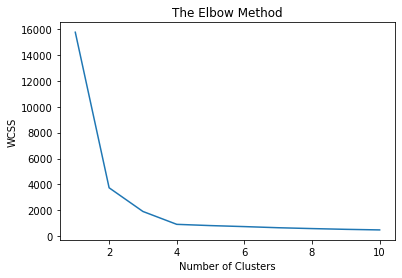

In [31]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=4,init="k-means++")
pred_kmeans=kmeans.fit_predict(X)
pred_kmeans

array([2, 2, 0, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 0, 0,
       3, 1, 3, 3, 1, 1, 0, 3, 2, 1, 3, 2, 3, 2, 0, 0, 2, 0, 3, 0, 1, 3,
       3, 2, 0, 3, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 3, 1, 1, 0, 3, 1, 3,
       2, 3, 0, 0, 2, 0, 3, 2, 3, 3, 2, 3, 3, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 0, 1, 3, 3, 1, 1, 0,
       3, 2, 1, 0, 1, 0, 1, 3, 1, 3, 0, 2, 2, 0, 3, 0, 1, 2, 2, 3, 1, 0,
       0, 0, 0, 2, 1, 3, 1, 1, 3, 2, 3, 1, 1, 1, 3, 3, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 2, 1, 0,
       0, 0, 0, 2, 3, 0, 1, 2, 2, 0, 3, 2, 2, 3, 1, 1, 2, 2, 3, 1, 3, 2,
       2, 1, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1,
       3, 2, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 3, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 3, 1, 1, 3, 3, 1, 0, 3, 0, 1, 3, 1, 0, 0,
       1, 3, 2, 2, 0, 0, 0, 3, 1, 1, 3, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 3, 0, 0, 0, 3, 3, 0, 2, 1, 2, 2, 2, 3, 0,

In [40]:
kmeans.inertia_

908.3855684760603

In [41]:
kmeans.cluster_centers_

array([[-10.00969056,  -3.84944007],
       [ -1.54234022,   4.43517599],
       [ -7.09306648,  -8.10994454],
       [ -6.08459039,  -3.17305983]])

In [42]:
clusterer = KMeans(n_clusters=4,init='k-means++', random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

In [68]:
Kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=Kmeans.fit_predict(X)
y_kmeans

array([2, 4, 0, 1, 3, 1, 3, 3, 3, 3, 2, 4, 3, 1, 3, 4, 3, 4, 1, 3, 0, 0,
       3, 1, 3, 3, 1, 1, 0, 3, 4, 1, 3, 2, 3, 2, 0, 0, 2, 0, 3, 0, 1, 3,
       3, 2, 0, 3, 1, 1, 1, 0, 0, 3, 4, 0, 0, 0, 0, 3, 1, 1, 0, 3, 1, 3,
       4, 3, 0, 0, 4, 0, 3, 2, 3, 3, 2, 3, 3, 0, 1, 1, 0, 1, 1, 0, 4, 1,
       0, 0, 1, 4, 0, 3, 1, 4, 4, 3, 4, 1, 1, 4, 1, 0, 1, 3, 3, 1, 1, 0,
       3, 2, 1, 0, 1, 0, 1, 3, 1, 3, 0, 4, 4, 0, 3, 0, 1, 2, 4, 3, 1, 0,
       0, 0, 0, 4, 1, 3, 1, 1, 3, 4, 3, 1, 1, 1, 3, 3, 2, 4, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 4, 3, 1, 4, 0, 3, 4, 1, 0,
       0, 0, 0, 4, 3, 0, 1, 4, 2, 4, 3, 2, 2, 4, 1, 1, 2, 4, 3, 1, 3, 2,
       4, 1, 2, 0, 1, 3, 3, 4, 3, 0, 2, 3, 0, 3, 0, 4, 3, 3, 3, 1, 0, 1,
       3, 4, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 4, 1, 2, 3, 0,
       4, 2, 4, 2, 3, 0, 2, 0, 3, 1, 1, 3, 3, 1, 0, 3, 0, 1, 3, 1, 0, 0,
       1, 3, 2, 2, 0, 0, 0, 3, 1, 1, 3, 1, 0, 4, 1, 2, 1, 2, 4, 1, 4, 1,
       1, 3, 0, 0, 0, 3, 3, 0, 2, 1, 2, 4, 4, 3, 0,

In [69]:
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.5741377071198657

In [71]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)
sample_silhouette_values# this sample_silhouette_values is
# distance of the each and every points to the entire other points

array([ 0.34677463,  0.49207782,  0.56874701,  0.50417507,  0.35586634,
        0.47142912,  0.69497001,  0.59361364,  0.04170062,  0.73774366,
        0.48268728,  0.01941005,  0.67057392,  0.32948516,  0.45520941,
        0.44984459,  0.10407067,  0.2520883 ,  0.04726982,  0.59817005,
        0.71283934,  0.67535737,  0.57265368,  0.47563371,  0.64907014,
        0.49456419,  0.02614123,  0.51161418,  0.63697831,  0.70638764,
        0.22006843,  0.48572026,  0.74673339,  0.03780326,  0.72308421,
        0.51782812,  0.69122689,  0.61408609,  0.41806934,  0.5736876 ,
        0.65173057,  0.57170711,  0.39416168,  0.51539606,  0.64210979,
        0.52742176,  0.5810399 ,  0.66828309,  0.27584714,  0.22136239,
        0.4419    ,  0.64921721,  0.54264388,  0.72893369,  0.40841947,
        0.70586969,  0.56644356,  0.31539623,  0.53502168,  0.46642802,
        0.16218669,  0.14614583,  0.45950871,  0.54091102,  0.31065351,
        0.67488435,  0.30193847,  0.69828496,  0.68261503,  0.39

In [72]:
len(sample_silhouette_values)

500

In [70]:
silhouette_avg = silhouette_score(X, y_kmeans)# intenally a(i)b(i)s(i) will calculated
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5741377071198657


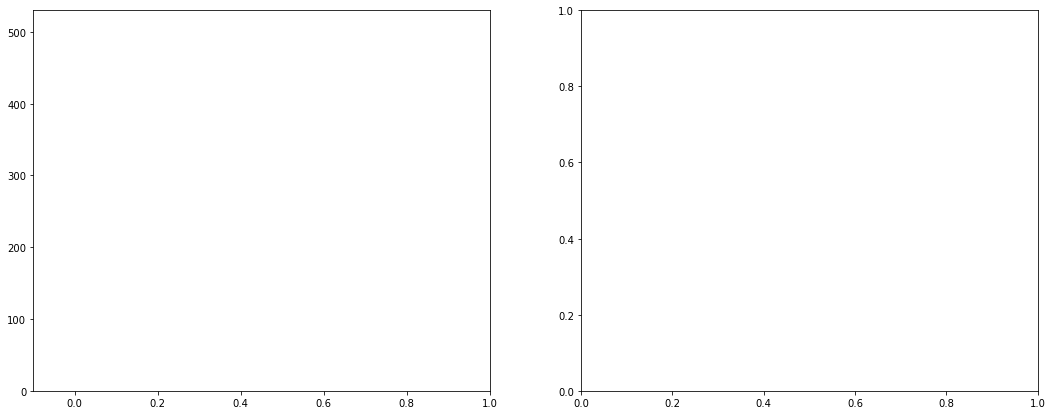

In [65]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    break

In [86]:
    y_lower = 10
    for i in range(2):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        break

In [87]:
ith_cluster_silhouette_values

array([0.02614123, 0.04625898, 0.04726982, 0.09077048, 0.10185376,
       0.10894245, 0.12329774, 0.14888067, 0.16239498, 0.16964106,
       0.17092644, 0.19101752, 0.20053577, 0.21348524, 0.21785519,
       0.22757445, 0.24323025, 0.24408862, 0.25103096, 0.28171384,
       0.28875589, 0.29173098, 0.30139648, 0.30569881, 0.306099  ,
       0.31376392, 0.32305264, 0.32411554, 0.32504948, 0.32707268,
       0.32825867, 0.32948516, 0.33310074, 0.34944303, 0.351845  ,
       0.35213975, 0.35279232, 0.35556925, 0.35647415, 0.35994947,
       0.38200296, 0.39416168, 0.39953228, 0.40189054, 0.41000389,
       0.41064193, 0.41245391, 0.41251076, 0.4161486 , 0.43013867,
       0.43753978, 0.4419    , 0.45191308, 0.45255997, 0.4574844 ,
       0.45843118, 0.46994438, 0.47142912, 0.49273228, 0.49394036,
       0.49895962, 0.50513912, 0.50650586, 0.51161418, 0.51386684])

In [113]:
for i in range(5):
    print(f"{i} :",X[cluster_labels==i],"\n")
    print(f"{i} :",sample_silhouette_values[cluster_labels==i],"\n")
    print("len = ",len(sample_silhouette_values[cluster_labels==i]))
    break

0 : [[-1.00051011e+00  2.77905153e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.19003455e-01  3.45278927e+00]
 [-1.69825542e+00  2.79071751e+00]
 [-3.28102793e-01  4.11918201e+00]
 [-2.52019906e-01  4.53559145e+00]
 [-8.66753040e-01  3.78295914e+00]
 [-1.34392496e+00  2.38428865e+00]
 [-4.26103071e-02  4.90923075e+00]
 [ 8.68765801e-01  4.15785509e+00]
 [-5.45176929e-01  3.81996593e+00]
 [-1.21819546e+00  4.30633464e+00]
 [-2.03484486e+00  3.76775946e+00]
 [-4.99221336e-01  4.77598259e+00]
 [-3.19091528e-02  4.74450157e+00]
 [-5.38142198e-01  4.81539041e+00]
 [-2.99151157e+00  2.64580131e+00]
 [-1.35938959e+00  4.05424002e+00]
 [-5.25790464e-01  3.30659860e+00]
 [-1.98605940e+00  3.06381408e+00]
 [-1.85139546e+00  3.51886090e+00]
 [-1.17104176e+00  4.33091816e+00]
 [-1.61589091e+00  4.18017563e+00]
 [ 5.26015501e-01  3.00999353e+00]
 [ 2.42271161e-04  5.14853403e+00]
 [-1.04102078e+00  3.96331794e+00]
 [-1.13898357e+0

In [108]:
len(ith_cluster_silhouette_values)

73

In [109]:
 ith_cluster_silhouette_values.shape[0]

73

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
 at 0  the len is =  375 this many  0 `s
 at 1  the len is =  125 this many  1 `s
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
 at 0  the len is =  251 this many  0 `s
 at 1  the len is =  125 this many  1 `s
 at 2  the len is =  124 this many  2 `s
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
 at 0  the len is =  123 this many  0 `s
 at 1  the len is =  125 this many  1 `s
 at 2  the len is =  124 this many  2 `s
 at 3  the len is =  128 this many  3 `s
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
 at 0  the len is =  125 this many  0 `s
 at 1  the len is =  125 this many  1 `s
 at 2  the len is =  61 this many  2 `s
 at 3  the len is =  121 this many  3 `s
 at 4  the len is =  68 this many  4 `s
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
 at 0  the len is =  65 this many  0 `s
 at 1  the len is =  125 this 

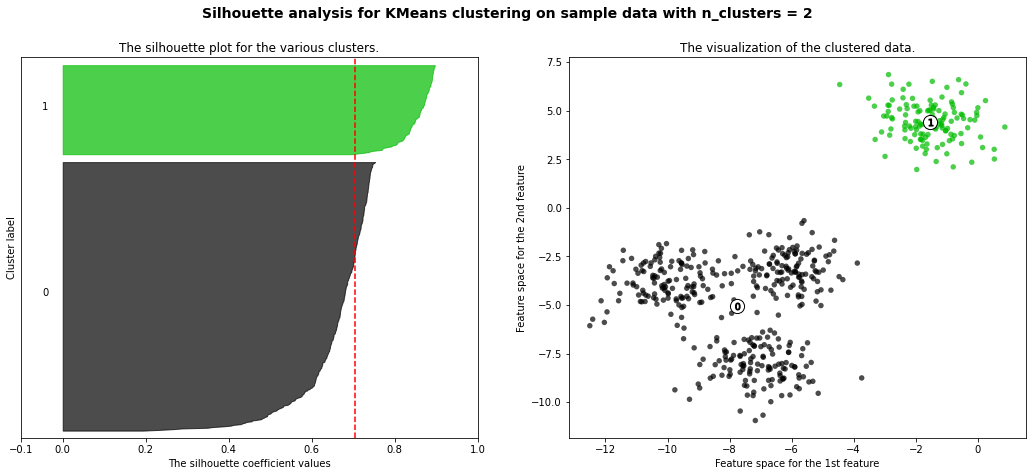

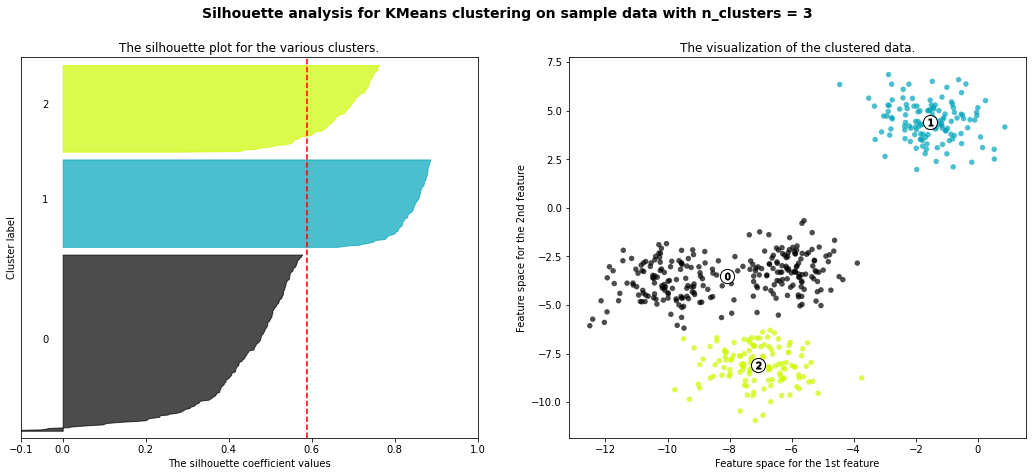

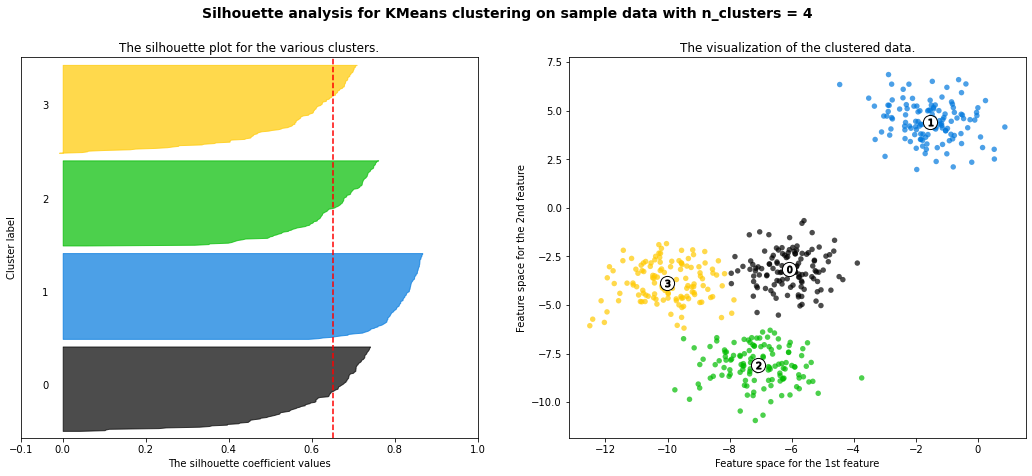

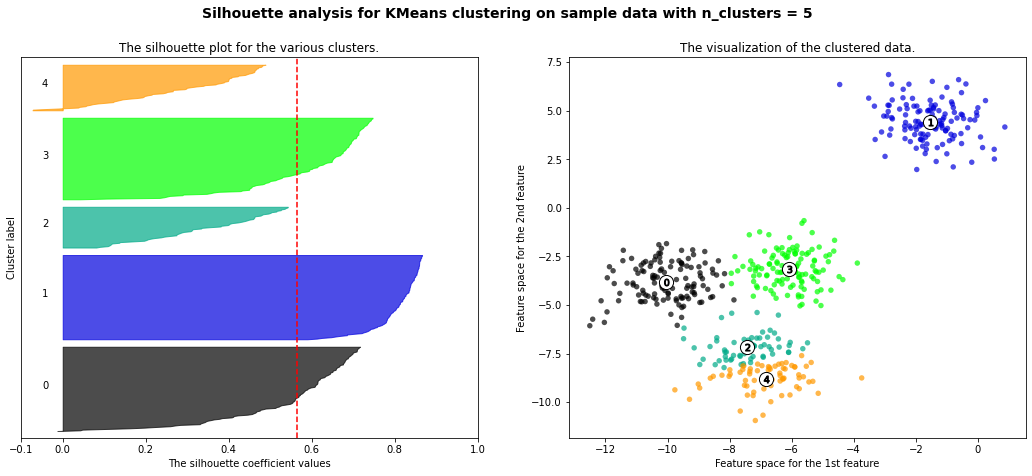

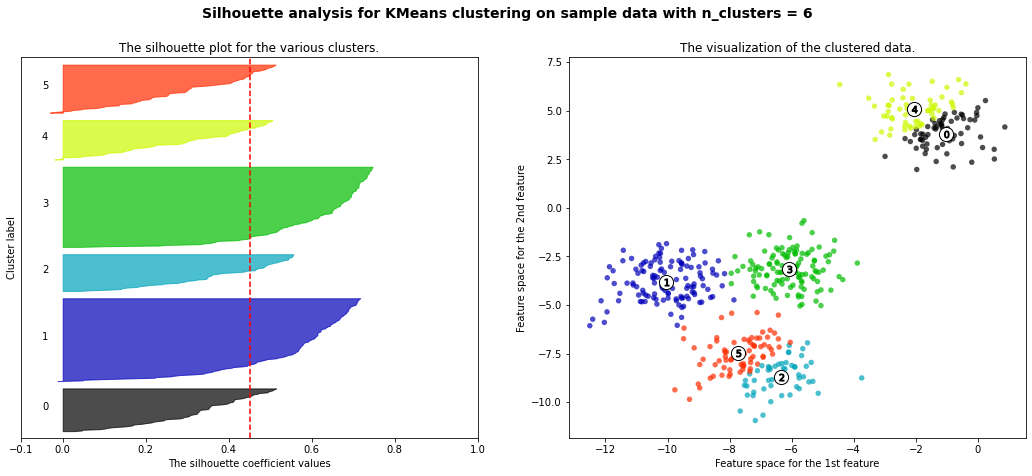

In [133]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters.
    
    silhouette_avg = silhouette_score(X, cluster_labels)# intenally a(i)b(i)s(i) will calculated
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)#silhouette_avg=S(i)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        print(f" at {i} ","the len is = ",len(sample_silhouette_values[cluster_labels == i]), "this many ",i,"`s")
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i 

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


plt.show()


In [157]:
lts_avg = []
for i in range(2,6):
    cluser_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluser_model.fit_predict(X)
    sil_avg=silhouette_score(X , cluster_labels)
    lts_avg.append(sil_avg)

In [158]:
lts_avg

[0.7049787496083262,
 0.5882004012129721,
 0.6505186632729437,
 0.5743946554642042]